In [1]:
#import pylab as pl
import matplotlib.pyplot as pl
import pandas as pa

T = pa.read_csv('season-1819.csv')

col = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']
T = T[col]

T.rename(columns = {'HomeTeam' : 'DOM', 'AwayTeam' : 'EXT', 'FTHG' : 'BDOM', 'FTAG' : 'BEXT'}, inplace = True )

T.head()

,Date,DOM,EXT,BDOM,BEXT
0,10/08/2018,Marseille,Toulouse,4,0
1,11/08/2018,Angers,Nimes,3,4
2,11/08/2018,Lille,Rennes,3,1
3,11/08/2018,Montpellier,Dijon,1,2
4,11/08/2018,Nantes,Monaco,1,3


In [2]:
len(T)

380

In [3]:
M = T['BDOM'].value_counts().sort_index()
M

0     88
1    127
2     99
3     43
4     14
5      8
9      1
Name: BDOM, dtype: int64

([<matplotlib.axis.XTick at 0x25939919590>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '9'),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, '')])

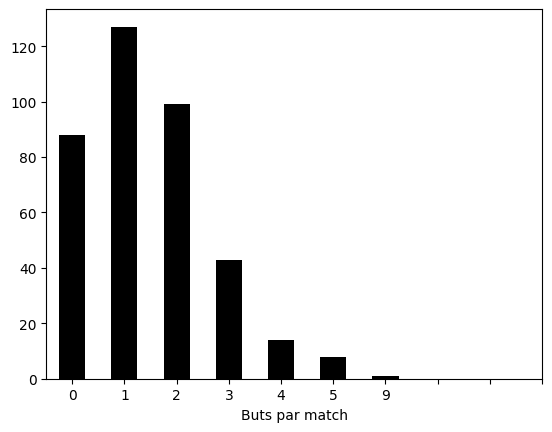

In [4]:
M.plot.bar(color = 'black')
pl.xlabel('Buts par match')
pl.xticks(range(10), rotation = 0)

In [5]:
m = T.mean()
m

C:\Users\ACER\AppData\Local\Temp\ipykernel_8376\1430832800.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  m = T.mean()


BDOM    1.471053
BEXT    1.086842
dtype: float64

In [6]:
m['BDOM']

1.4710526315789474

In [7]:
m['BEXT']

1.0868421052631578

In [8]:
from scipy.stats import binom

X = binom(45, m['BDOM']/45)
E = [380 * X.pmf(k) for k in range(7)]
E

[85.16044125864526,
 129.50915300533373,
 96.2882270515444,
 46.64127750514823,
 16.550449085089646,
 4.586418506513136,
 1.0333143683940296]

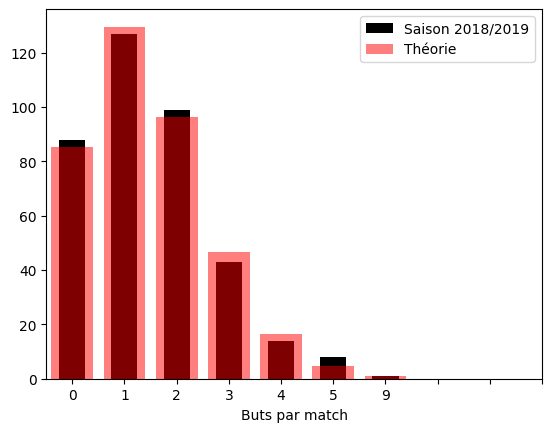

In [9]:
M.plot.bar(color = 'black')
pl.bar(range(7), E, color = 'red', alpha = 0.5, label = 'Théorie')
pl.xlabel('Buts par match')
pl.xticks(range(10), rotation = 0)
pl.legend(labels = ['Saison 2018/2019', 'Théorie'])

In [10]:
TD = T.query('DOM == "Marseille"').mean()
TD

C:\Users\ACER\AppData\Local\Temp\ipykernel_8376\2640204658.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  TD = T.query('DOM == "Marseille"').mean()


BDOM    1.631579
BEXT    0.894737
dtype: float64

In [11]:
TD['BDOM'] / m['BDOM']

1.10912343470483

In [12]:
TD['BEXT'] / m['BEXT']

0.8232445520581114

In [13]:
TE = T.query('EXT == "Toulouse"').mean()
TE

C:\Users\ACER\AppData\Local\Temp\ipykernel_8376\3717343057.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  TE = T.query('EXT == "Toulouse"').mean()


BDOM    1.631579
BEXT    0.789474
dtype: float64

In [14]:
TE['BDOM'] / m['BDOM']

1.10912343470483

In [15]:
TE['BEXT'] / m['BEXT']

0.7263922518159807

In [16]:
(TD['BDOM'] / m['BDOM']) * (TE['BDOM'] / m['BDOM']) * m['BDOM']

1.809622446097354

In [17]:
(TD['BEXT'] / m['BEXT']) * (TE['BEXT'] / m['BEXT']) * m['BEXT']

0.6499299095195616

In [18]:
def Esp(e1, e2):
    TD = T.query('DOM == @e1').mean()
    TE = T.query('EXT == @e2').mean()
    EX = TD['BDOM'] * TE['BDOM'] / m['BDOM']
    EY = TD['BEXT'] * TE['BEXT'] / m['BEXT']
    
    return EX, EY

In [19]:
m1, m2 = Esp('Marseille', 'Toulouse')
m1, m2

C:\Users\ACER\AppData\Local\Temp\ipykernel_8376\2584379806.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  TD = T.query('DOM == @e1').mean()
C:\Users\ACER\AppData\Local\Temp\ipykernel_8376\2584379806.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  TE = T.query('EXT == @e2').mean()


(1.809622446097354, 0.6499299095195616)

In [20]:
X = binom(45, m1 / 45)
Y = binom(45, m2 / 45)
s = 0
for i in range(7):
    s = s + X.pmf(i) * Y.pmf(i)
s

0.2182054853357182

In [21]:
for match in range(380):
    e1 = T.loc[match, 'DOM']
    e2 = T.loc[match, 'EXT']
    T.loc[match, 'EX'], T.loc[match, 'EY'] = Esp(e1, e2)
T.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_8376\2584379806.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  TD = T.query('DOM == @e1').mean()
C:\Users\ACER\AppData\Local\Temp\ipykernel_8376\2584379806.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  TE = T.query('EXT == @e2').mean()
C:\Users\ACER\AppData\Local\Temp\ipykernel_8376\2584379806.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is depre

,Date,DOM,EXT,BDOM,BEXT,EX,EY
0,10/08/2018,Marseille,Toulouse,4,0,1.809622,0.649930
1,11/08/2018,Angers,Nimes,3,4,1.717352,1.513954
2,11/08/2018,Lille,Rennes,3,1,2.689012,0.785013
3,11/08/2018,Montpellier,Dijon,1,2,1.809622,0.662674
4,11/08/2018,Nantes,Monaco,1,3,1.845401,1.162228


In [22]:
P_Off = {equipe : 0 for equipe in set(T['DOM'])}
P_Off

{'Toulouse': 0,
 'Guingamp': 0,
 'St Etienne': 0,
 'Strasbourg': 0,
 'Marseille': 0,
 'Bordeaux': 0,
 'Lyon': 0,
 'Angers': 0,
 'Monaco': 0,
 'Caen': 0,
 'Reims': 0,
 'Paris SG': 0,
 'Nimes': 0,
 'Nantes': 0,
 'Nice': 0,
 'Dijon': 0,
 'Lille': 0,
 'Rennes': 0,
 'Amiens': 0,
 'Montpellier': 0}

In [23]:
for e1, e2, x, y in zip(T['DOM'], T['EXT'], T['BDOM'], T['BEXT']):
    if x > y:
        P_Off[e1] = P_Off[e1] + 3
    elif x == y:
        P_Off[e1] = P_Off[e1] + 1
        P_Off[e2] = P_Off[e2] + 1
    else: 
        P_Off[e2] = P_Off[e2] + 3
P_Off

{'Toulouse': 38,
 'Guingamp': 27,
 'St Etienne': 66,
 'Strasbourg': 49,
 'Marseille': 61,
 'Bordeaux': 41,
 'Lyon': 72,
 'Angers': 46,
 'Monaco': 36,
 'Caen': 33,
 'Reims': 55,
 'Paris SG': 91,
 'Nimes': 53,
 'Nantes': 48,
 'Nice': 56,
 'Dijon': 34,
 'Lille': 75,
 'Rennes': 52,
 'Amiens': 38,
 'Montpellier': 59}

In [24]:
from random import *
from math import floor

def nb_buts(EX):
    X = 0
    for k in range(45):
        X = X + floor(random() + EX/45)
    return X

In [25]:
def simulation(n):
    P = {team : 0 for team in set(T['DOM'])}
    for k in range(n):
        for e1, e2, EX, EY in zip(T['DOM'], T['EXT'], T['EX'], T['EY']):
            x = nb_buts(EX)
            y = nb_buts(EY)
            if x > y :
                P[e1] = P[e1] + 3
            elif x == y:
                P[e1] = P[e1] + 1
                P[e2] = P[e2] + 1
            else :
                P[e2] = P[e2] + 3       
    return {equipe : P[equipe]/n for equipe in P }

In [ ]:
P_Sim = simulation(20000)
P_Sim

In [ ]:
M = pa.DataFrame()
M['Equipe'] = list(set(T['DOM']))
for k in range(20):
    equipe = M.loc[k, 'Equipe']
    M.loc[k, 'Points_Off'] = P_Off[equipe]
    M.loc[k, 'Points_Sim'] = P_Sim[equipe]

# création de ka colonne des rangs officiels   
M['Rangs_Off'] = M['Points_Off'].rank(ascending = False)
M['Rangs_Off'] = M['Rangs_Off'].astype(int)

# création de ka colonne des rangs simulés
M['Rangs_Sim'] = M['Points_Sim'].rank(ascending = False)
M['Rangs_Sim'] = M['Rangs_Sim'].astype(int)

#Affichage de T trié selon Points_Off
M.sort_values(by = 'Points_Off', ascending = False)

In [ ]:
import pandas as pa
import glob
import csv, os

path = "C:/Users/ACER/datascience/premier-league"
files_joined = os.path.join(path, "season*.csv")
list_files = glob.glob(files_joined)
T = pa.concat(map(pa.read_csv, list_files), ignore_index=True)

col = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']
T = T[col]

T.rename(columns = {'HomeTeam' : 'DOM', 'AwayTeam' : 'EXT', 'FTHG' : 'BDOM', 'FTAG' : 'BEXT'}, inplace = True )


T.head()

In [ ]:
len(T)

In [ ]:
len(T.query('BDOM == 0 and BEXT == 0'))

In [ ]:
len( T.query('BDOM == 0 and BEXT == 0')) / len(T)

In [ ]:
T.query('BDOM == BEXT')

In [ ]:
p = len( T.query('BDOM == BEXT')) / len(T)
p

In [ ]:
S = T.query('DOM in ["Everton", "Liverpool"] and \
            EXT in ["Everton", "Liverpool"]')
S

In [ ]:
n = len(S.query('BDOM == BEXT'))
n

In [ ]:
from scipy.stats import binom

In [ ]:
X = binom(12, p)
1 - X.cdf(6)

In [ ]:
R = T.groupby(['BDOM', 'BEXT']).count()
R = R[['Date']]
R.reset_index(inplace = True)
R

In [ ]:
R['Freq'] = R['Date'] / len(T)

In [ ]:
R.sort_values('Date', ascending = False, inplace=True)
R.head(10)

In [ ]:
import pandas as pa
import glob
import csv, os

path = "C:/Users/ACER/datascience/premier-league"
files_joined = os.path.join(path, "season*.csv")
list_files = glob.glob(files_joined)
T = pa.concat(map(pa.read_csv, list_files), ignore_index=True)

col = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']
T = T[col]

T.rename(columns = {'HomeTeam' : 'DOM', 'AwayTeam' : 'EXT', 'FTHG' : 'BDOM', 'FTAG' : 'BEXT'}, inplace = True )


T.head()

In [ ]:
len(T)

In [ ]:
pa.crosstab(T['BDOM'], T['BEXT'],
           margins = True,
           normalize = False)

In [ ]:
P = pa.crosstab(T['BDOM'], T['BEXT'],
           margins = True,
           normalize = True)
P

In [ ]:
EX = 0
for k in range(9):
    EX = EX + k * P.loc[k, 'All']
EX

In [ ]:
EY = 0
for k in range(8):
    EY = EY + k * P.loc['All', k]
EY

In [ ]:
pl.style.use('bmh')

In [ ]:
pl.plot([0, 8], [0, 8] ,color = 'red', linewidth = 1)
pl.plot(EX, EY, 'o', color = 'black', markersize = 10)
pl.xticks(range(10))
pl.yticks(range(10))
for i in range(8):
    for j in range(9):
        pl.scatter(j, i, marker = 's',
                  facecolor = 'chocolate',
                  edgecolor = 'black',
                  s = 4000 * P.loc[j, i],
                  linewidth = 1)

for k in range(9):
    pl.scatter(k, 9, marker = 's',
        facecolor = 'white',
        color = 'black',
        hatch = '////',
        s = 4000 * P.loc[k, 'All'],
        linewidth = 2)
    
for k in range(8):
    pl.scatter(9, k, marker = 's',
        facecolor = 'white',
        color = 'blue',
        hatch = '\\\\\\\\',
        s = 4000 * P.loc['All', k],
        linewidth = 2)

pl.scatter(9, k, marker = 's',
    facecolor = 'white',
    color = 'chocolate',
    hatch = 'xx',
    s = 4000,
    linewidth = 2)